<a href="https://colab.research.google.com/github/doomer-doomer/RSIPredictor/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Module Installation

In [ ]:
!pip3 install tensorflow

  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)


In [ ]:
!pip install yfinance

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pydantic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Uninstalling pydantic-1.10.13:
      Successfully uninstalled pydantic-1.10.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import json
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from datetime import datetime
from google.colab import drive
from tensorflow.keras.layers import GRU, Input, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
#from arch import arch_model
drive.mount("/content/drive")

Mounted at /content/drive


##Data Defining

In [ ]:
def get_historical_data(ticker, period, interval):
    try:
        stock_data = yf.download(ticker, period=period, interval=interval)
        stock_data.reset_index(inplace=True)

        return stock_data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

if __name__ == "__main__":

    ticker = "^NSEI"
    period="10y"
    interval = "1d"


    historical_data = get_historical_data(ticker, period, interval)

    if historical_data is not None:
        historical_json = []
        for index, row in historical_data.iterrows():
            date_str = row["Date"].strftime("%Y-%m-%d")
            data_object = {
                "Date": date_str,
                "Open": row["Open"],
                "High": row["High"],
                "Low": row["Low"],
                "Close": row["Close"],
                "Volume": row["Volume"],
                "Adj Close": row["Adj Close"]
            }
            historical_json.append(data_object)

        historical_json_string = json.dumps(historical_json, indent=4)
        print(historical_json_string)

        with open("historical_data.json", "w") as json_file:
            json_file.write(historical_json_string)
    else:
        print("No data available.")


Streaming output truncated to the last 5000 lines.
        "Close": 15752.400390625,
        "Volume": 242100,
        "Adj Close": 15752.400390625
    },
    {
        "Date": "2021-07-20",
        "Open": 15703.9501953125,
        "High": 15728.4501953125,
        "Low": 15578.5498046875,
        "Close": 15632.099609375,
        "Volume": 274300,
        "Adj Close": 15632.099609375
    },
    {
        "Date": "2021-07-22",
        "Open": 15736.599609375,
        "High": 15834.7998046875,
        "Low": 15726.400390625,
        "Close": 15824.0498046875,
        "Volume": 265300,
        "Adj Close": 15824.0498046875
    },
    {
        "Date": "2021-07-23",
        "Open": 15856.7998046875,
        "High": 15899.7998046875,
        "Low": 15768.400390625,
        "Close": 15856.0498046875,
        "Volume": 294100,
        "Adj Close": 15856.0498046875
    },
    {
        "Date": "2021-07-26",
        "Open": 15849.2998046875,
        "High": 15893.349609375,
        "Low": 157

In [ ]:
import pandas as pd
ticker = yf.Ticker("ITC.NS")
options_data = ticker.options
print(options_data)
for i in range(len(options_data)):
  option_chain = ticker.option_chain(options_data[i])
  print(option_chain)

()


In [ ]:
import pandas as pd
f = open('historical_data.json')
data = json.load(f)
print(data)
df = pd.DataFrame(data)

[{'Date': '2013-10-14', 'Open': 6093.0, 'High': 6124.10009765625, 'Low': 6082.89990234375, 'Close': 6112.7001953125, 'Volume': 142200, 'Adj Close': 6112.7001953125}, {'Date': '2013-10-15', 'Open': 6147.5498046875, 'High': 6156.2998046875, 'Low': 6056.5498046875, 'Close': 6089.0498046875, 'Volume': 218300, 'Adj Close': 6089.0498046875}, {'Date': '2013-10-17', 'Open': 6098.5, 'High': 6110.75, 'Low': 6032.5498046875, 'Close': 6045.85009765625, 'Volume': 230600, 'Adj Close': 6045.85009765625}, {'Date': '2013-10-18', 'Open': 6070.89990234375, 'High': 6201.4501953125, 'Low': 6070.89990234375, 'Close': 6189.35009765625, 'Volume': 250300, 'Adj Close': 6189.35009765625}, {'Date': '2013-10-21', 'Open': 6202.0, 'High': 6218.9501953125, 'Low': 6163.2998046875, 'Close': 6204.9501953125, 'Volume': 197000, 'Adj Close': 6204.9501953125}, {'Date': '2013-10-22', 'Open': 6192.2998046875, 'High': 6220.10009765625, 'Low': 6181.7998046875, 'Close': 6202.7998046875, 'Volume': 161900, 'Adj Close': 6202.799804

In [ ]:
df['Returns'] = df['Close'].pct_change()
df = df.dropna()
print(df)

           Date          Open          High           Low         Close  \
1    2022-07-27  16475.349609  16653.449219  16438.750000  16641.800781   
2    2022-07-28  16774.849609  16947.650391  16746.250000  16929.599609   
3    2022-07-29  17079.500000  17172.800781  17018.150391  17158.250000   
4    2022-08-01  17243.199219  17356.250000  17154.800781  17340.050781   
5    2022-08-02  17310.150391  17390.150391  17215.849609  17345.449219   
..          ...           ...           ...           ...           ...   
257  2023-08-09  19578.800781  19645.500000  19467.500000  19632.550781   
258  2023-08-10  19605.550781  19623.599609  19495.400391  19543.099609   
259  2023-08-11  19554.250000  19557.750000  19412.750000  19428.300781   
260  2023-08-14  19383.949219  19465.849609  19257.900391  19434.550781   
261  2023-08-16  19369.000000  19482.750000  19317.199219  19465.000000   

     Volume     Adj Close   Returns  
1    185200  16641.800781  0.009582  
2    376300  16929.5996

In [ ]:
returns = df['Returns']
model = arch_model(returns, vol='FIGARCH', p=0, q=0)
results = model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1610788482.5394998
Iteration:      2,   Func. Count:     15,   Neg. LLF: -925.8757672391187
Optimization terminated successfully    (Exit mode 0)
            Current function value: -925.8757674578615
            Iterations: 6
            Function evaluations: 15
            Gradient evaluations: 2
                     Constant Mean - FIARCH Model Results                     
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     FIARCH   Log-Likelihood:                925.876
Distribution:                  Normal   AIC:                          -1845.75
Method:            Maximum Likelihood   BIC:                          -1835.06
                                        No. Observations:                  261
Date:                Thu, Aug 24 2023   Df Residuals:                      260
Time:         

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.155e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
forecast_horizon = 1
forecasted_volatility = results.forecast(horizon=forecast_horizon)

In [ ]:
next_day_volatility = forecasted_volatility.variance.values[-1, 0]

In [ ]:
print("Forecasted Volatility for the Next 1 Day:", next_day_volatility)

Forecasted Volatility for the Next 1 Day: nan


##Data Processing

In [ ]:
def create_features(data):
    data.sort(key=lambda x: x['Date'])

    close_prices = pd.Series([entry['Close'] for entry in data])
    for i in range(len(data)):
        close = data[i].get('Close', 0)
        high = data[i].get('High', 0)
        low = data[i].get('Low', 0)
        open_price = data[i].get('Open', 0)
        volume = data[i].get('Volume', 0)

        data[i]['MA_9'] = compute_moving_average(close_prices, window=9)
        data[i]['MA_21'] = compute_moving_average(close_prices, window=21)

        data[i]['RSI'] = compute_rsi(close_prices, window=9)

        date_str = data[i].get('Date')
        if date_str:
            date_obj = datetime.strptime(date_str, '%Y-%m-%d')
            day_of_week = date_obj.weekday()
            month = date_obj.month
            quarter = (month - 1) // 3 + 1

            data[i]['DayOfWeek'] = day_of_week
            data[i]['Month'] = month
            data[i]['Quarter'] = quarter

    return data

def compute_rsi(close_prices, window=9):

    close_series = pd.Series(close_prices)

    delta = close_series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.iloc[-1]


def prepare_data(data, lookback_window=30):
    X, y = [], []
    for i in range(len(data) - lookback_window):
        X.append(data[i:i + lookback_window])
        y.append(data[i + lookback_window]['Close'])
    return np.array(X), np.array(y)

def compute_moving_average(close_prices, window=5):
    ma = close_prices[-window:].mean()
    return ma

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def calculate_sigmoid_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()

    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    macd_histogram = macd_line - signal_line

    sigmoid_macd_line = sigmoid(macd_line)
    sigmoid_signal_line = sigmoid(signal_line)

    return sigmoid_macd_line, sigmoid_signal_line

In [ ]:
lowest_close = min(data, key=lambda x: x['Close'])['Close']
highest_close = max(data, key=lambda x: x['Close'])['Close']

json_data = []
for row in data:
    json_data.append({
        'Close':row["Close"],
        # 'High':row["High"],
        # 'Low':row["Low"],
        # 'Open':row['Open']
    })


stock_data = create_features(data)
print(stock_data)

pdData = pd.DataFrame(stock_data)
print(pdData)

with_rsi = []
with_date_rsi=[]

close_prices = pd.Series([entry['Close'] for entry in data])
volume = pd.Series([entry['Volume'] for entry in data])
date = pd.Series([entry['Date'] for entry in data])
results_df = pd.DataFrame(columns=['Close', 'RSI','Volume'])


for i in range(len(close_prices) - 9):
    current_sequence = close_prices[i:i + 9]
    current_date = date[i+8]
    current_close = close_prices[i+8]
    current_rsi = compute_rsi(current_sequence, window=9)
    rsi_value = current_rsi
    ma9 = compute_moving_average(current_sequence, window=9)
    ma9_val = ma9
    sigmoid_macd_line,sigmoid_macd_signal = calculate_sigmoid_macd(close_prices,short_window=12, long_window=26, signal_window=9)
    line = sigmoid_macd_line
    signal = sigmoid_macd_signal
    close_price = current_sequence

    with_rsi.append({
        'RSI': round(rsi_value/100, 2),
        })

    with_date_rsi.append({
        "Date":current_date,
        "RSI":round(rsi_value/100, 2),
        "Close":current_close
    })

print(with_date_rsi)

features = ["RSI"]

dataset = []
for entry in with_rsi:
        sample = []
        for feature in features:
            value = entry.get(feature)
            if value is None:
                sample.append(0)
            else:
                sample.append(value)
        dataset.append(sample)
dataset = np.array(dataset)
print(dataset)

[{'Date': '2013-10-14', 'Open': 6093.0, 'High': 6124.10009765625, 'Low': 6082.89990234375, 'Close': 6112.7001953125, 'Volume': 142200, 'Adj Close': 6112.7001953125, 'MA_9': 19635.85546875, 'MA_21': 19750.333333333332, 'RSI': 56.12737917828924, 'DayOfWeek': 0, 'Month': 10, 'Quarter': 4}, {'Date': '2013-10-15', 'Open': 6147.5498046875, 'High': 6156.2998046875, 'Low': 6056.5498046875, 'Close': 6089.0498046875, 'Volume': 218300, 'Adj Close': 6089.0498046875, 'MA_9': 19635.85546875, 'MA_21': 19750.333333333332, 'RSI': 56.12737917828924, 'DayOfWeek': 1, 'Month': 10, 'Quarter': 4}, {'Date': '2013-10-17', 'Open': 6098.5, 'High': 6110.75, 'Low': 6032.5498046875, 'Close': 6045.85009765625, 'Volume': 230600, 'Adj Close': 6045.85009765625, 'MA_9': 19635.85546875, 'MA_21': 19750.333333333332, 'RSI': 56.12737917828924, 'DayOfWeek': 3, 'Month': 10, 'Quarter': 4}, {'Date': '2013-10-18', 'Open': 6070.89990234375, 'High': 6201.4501953125, 'Low': 6070.89990234375, 'Close': 6189.35009765625, 'Volume': 250

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


[{'Date': '2013-10-25', 'RSI': 0.56, 'Close': 6144.89990234375}, {'Date': '2013-10-28', 'RSI': 0.52, 'Close': 6101.10009765625}, {'Date': '2013-10-29', 'RSI': 0.73, 'Close': 6220.89990234375}, {'Date': '2013-10-30', 'RSI': 0.62, 'Close': 6251.7001953125}, {'Date': '2013-10-31', 'RSI': 0.66, 'Close': 6299.14990234375}, {'Date': '2013-11-01', 'RSI': 0.67, 'Close': 6307.2001953125}, {'Date': '2013-11-05', 'RSI': 0.61, 'Close': 6253.14990234375}, {'Date': '2013-11-06', 'RSI': 0.57, 'Close': 6215.14990234375}, {'Date': '2013-11-07', 'RSI': 0.56, 'Close': 6187.25}, {'Date': '2013-11-08', 'RSI': 0.55, 'Close': 6140.75}, {'Date': '2013-11-11', 'RSI': 0.27, 'Close': 6078.7998046875}, {'Date': '2013-11-12', 'RSI': 0.16, 'Close': 6018.0498046875}, {'Date': '2013-11-13', 'RSI': 0.02, 'Close': 5989.60009765625}, {'Date': '2013-11-14', 'RSI': 0.17, 'Close': 6056.14990234375}, {'Date': '2013-11-18', 'RSI': 0.43, 'Close': 6189.0}, {'Date': '2013-11-19', 'RSI': 0.49, 'Close': 6203.35009765625}, {'Date'

##Normalization

In [ ]:
def normalize_datas(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(data)
    normalized_data = scaler.transform(data)
    return normalized_data, scaler

def denormalize_datas(normalized_data, scaler):
    denormalized_data = scaler.inverse_transform(normalized_data.reshape(-1, len(scaler.data_max_)))
    return denormalized_data

##Verification split

In [ ]:
#normalized,scale = normalize_datas(dataset)

steps = 5

z = []
for i in range(steps, len(dataset)):
    z.append(dataset[i+1 - steps:i+1])

z = np.array(z)

split_ratio = 0.9
split_index = int(split_ratio * len(z))

# z_val = z[-24:]

print(z)

[[[0.21]
  [0.07]
  [0.2 ]
  [0.24]
  [0.26]]]


##Validation and Testing split

In [ ]:
#normalized,scale = normalize_datas(dataset)

n_steps = 5

X = []
y = []

for i in range(n_steps, len(dataset)):
    X.append(dataset[i+1 - n_steps:i+1])
    y.append(dataset[i])

X = np.array(X)
y = np.array(y)

print(X)
print(y)
print(X.shape)

[[[0.52]
  [0.73]
  [0.62]
  [0.66]
  [0.67]]

 [[0.73]
  [0.62]
  [0.66]
  [0.67]
  [0.61]]

 [[0.62]
  [0.66]
  [0.67]
  [0.61]
  [0.57]]

 ...

 [[0.26]
  [0.41]
  [0.49]
  [0.42]
  [0.49]]

 [[0.41]
  [0.49]
  [0.42]
  [0.49]
  [0.65]]

 [[0.49]
  [0.42]
  [0.49]
  [0.65]
  [0.59]]]
[[0.67]
 [0.61]
 [0.57]
 ...
 [0.49]
 [0.65]
 [0.59]]
(2441, 5, 1)


In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

split_ratio = 0.9
split_index = int(split_ratio * len(X))

X_train = X[:split_index]
y_train = y[:split_index]
X_val = X[split_index:]
y_val = y[split_index:]


print(X_val.shape)
print(y_val.shape)
print(X_val)

X shape: (2441, 5, 1)
y shape: (2441, 1)
(245, 5, 1)
(245, 1)
[[[0.61]
  [0.47]
  [0.62]
  [0.52]
  [0.57]]

 [[0.47]
  [0.62]
  [0.52]
  [0.57]
  [0.59]]

 [[0.62]
  [0.52]
  [0.57]
  [0.59]
  [0.65]]

 ...

 [[0.26]
  [0.41]
  [0.49]
  [0.42]
  [0.49]]

 [[0.41]
  [0.49]
  [0.42]
  [0.49]
  [0.65]]

 [[0.49]
  [0.42]
  [0.49]
  [0.65]
  [0.59]]]


In [ ]:
print(z.shape)

(248, 5, 1)


##Model Initialization

In [ ]:
import matplotlib.pyplot as plt

def plot_history (history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.grid(True)

  plt.show()

In [ ]:
def train_model(X_train,y_train,batch_size,epochs,num_nodes,drop_out,LSTM_rate,GRU_rate,lr):
  model = Sequential()
  model.add(LSTM(LSTM_rate,return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
  model.add(Dropout(drop_out))
  model.add(GRU(GRU_rate, return_sequences=True))
  model.add(LSTM(int(LSTM_rate/2),return_sequences=False,input_shape = (X.shape[1],X.shape[2])))
  model.add(Dropout(drop_out))
  model.add(Dense(num_nodes*2))
  model.add(Dense(num_nodes))
  model.add(Dense(int(num_nodes/3)))
  model.add(Dense(2,activation="sigmoid"))

  model.compile(optimizer=Adam(learning_rate=lr), loss='mse')

  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  history = model.fit(
      X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),
      callbacks=[early_stopping],
      verbose=0)

  return model,history


In [ ]:
def reset_model_states(model):
  """Resets the states of all stateful layers in the model.

  Args:
    model: A Keras model.
  """

  for layer in model.layers:
    if isinstance(layer, tf.keras.layers.LSTM) or isinstance(layer, tf.keras.layers.GRU):
      layer.reset_states()

In [ ]:
def create_stateful_model(X_train,y_train,batch_size,epochs,num_nodes,drop_out,LSTM_rate,GRU_rate,lr):
  model = Sequential()
  reset_model_states(model)
  model.add(LSTM(LSTM_rate, return_sequences=True, batch_input_shape=(batch_size,X.shape[1], X.shape[2]), stateful=True))
  model.add(Dropout(drop_out))
  model.add(GRU(GRU_rate, return_sequences=True, stateful=True))
  model.add(LSTM(int(LSTM_rate/2), return_sequences=False, batch_input_shape=(batch_size,X.shape[1], X.shape[2]), stateful=True))
  model.add(Dropout(drop_out))
  model.add(Dense(num_nodes*2))
  model.add(Dense(num_nodes))
  model.add(Dense(int(num_nodes/3)))
  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer=Adam(learning_rate=lr), loss='mse')

  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  history = model.fit(
      X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val),
      callbacks=[early_stopping],
      verbose=1,shuffle=False)

  reset_model_states(model)
  return model, history

In [ ]:
import matplotlib.pyplot as plt

class CustomHistory:
    def __init__(self):
        self.loss = []
        self.val_loss = []

    def on_epoch_end(self, logs):
        self.loss.append(logs['loss'])
        self.val_loss.append(logs.get('val_loss', None))

def plot_history(custom_history):
    plt.plot(custom_history.history['loss'], label='loss')
    if custom_history.history['val_loss'] is not None:
        plt.plot(custom_history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create a custom history object
custom_history = CustomHistory()


##Hyperparameter Tuning and Training of Model

In [ ]:
epochs=50
least_val_loss = float('inf')
least_loss_model = None
for num_nodes in [9,45,90]:
  for drop_out in [0,0.2]:
    for lr in [0.003,0.015,0.001]:
      for LSTM_rate in [32,64,128]:
        for GRU_rate in [32,64,128]:
          for batch_size in [32,64,128]:
            print(f'Nodes:{num_nodes} - Dropout: {drop_out} - Learning Rate: {lr} - LSTM nodes: {LSTM_rate} - GRU nodes: {GRU_rate} - batch size: {batch_size}')
            model,history = train_model(X_train,y_train,batch_size,epochs,num_nodes,drop_out,LSTM_rate,GRU_rate,lr)
            plot_history(history)
            val_loss = model.evaluate(X_val, y_val)
            if val_loss < least_val_loss:
              least_val_loss = val_loss
              least_loss_model = model


Nodes:9 - Dropout: 0 - Learning Rate: 0.003 - LSTM nodes: 32 - GRU nodes: 32 - Batch size: 32


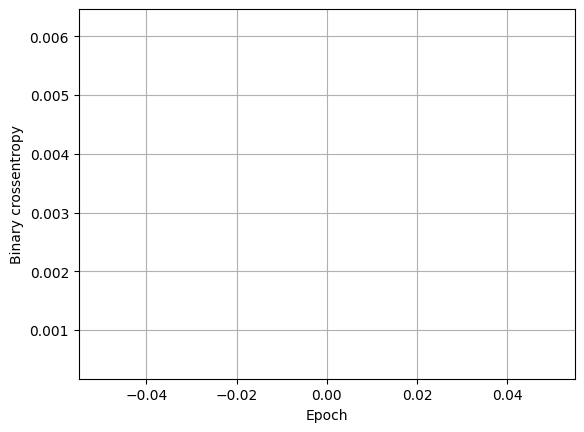

InvalidArgumentError: ignored

In [ ]:
epochs = 50
least_val_loss = float('inf')
least_loss_model = None
for num_nodes in [9, 45, 90]:
  for drop_out in [0, 0.2]:
    for lr in [0.003, 0.015, 0.001]:
      for LSTM_rate in [32, 64, 128]:
        for GRU_rate in [32, 64, 128]:
          for batch_size in [32,64,128]:
            print(f'Nodes:{num_nodes} - Dropout: {drop_out} - Learning Rate: {lr} - LSTM nodes: {LSTM_rate} - GRU nodes: {GRU_rate} - Batch size: {batch_size}')
            model, history = create_stateful_model(X_train, y_train, 1, 1, num_nodes, drop_out, LSTM_rate, GRU_rate, lr)
            plot_history(history)
            val_loss = model.evaluate(X_val, y_val)
            if val_loss < least_val_loss:
              least_val_loss = val_loss
              least_loss_model = model

In [ ]:
num_epochs = 2
for epoch in range(num_epochs):
    model, history = create_stateful_model(X_train, y_train, 1, 1, 9, 0, 128, 128, 0.003)
    model.reset_states()




2196/2196 [==============================] - 25s 8ms/step - loss: 0.0555 - val_loss: 0.0492


In [ ]:
test_predictions = model.predict(X_val, batch_size=1)
print(test_predictions)

245/245 [==============================] - 2s 7ms/step
[[0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.55687994]
 [0.5568799 ]
 [0.5568799 ]
 [0.55687994]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.5568799 ]
 [0.556

In [ ]:
least_loss = least_loss_model.predict(X_val)
least_loss_model.save("/content/drive/MyDrive/Models/80P-RSI-5D-10Y-Close.keras")
print(least_loss)

NameError: ignored

In [ ]:
y_pred = model.predict(X_val)
# y_pred = model.predict(X_val)

mse = np.mean(np.square(y_val - y_pred))
print("MSE:", mse)

13/13 [==============================] - 0s 3ms/step
[[0.40144697]
 [0.46780613]
 [0.50427103]
 [0.61977804]
 [0.8485316 ]
 [0.8337352 ]
 [0.8298365 ]
 [0.8217406 ]
 [0.8675476 ]
 [0.7441884 ]
 [0.7366208 ]
 [0.787354  ]
 [0.79653424]
 [0.7958307 ]
 [0.7701684 ]
 [0.73620564]
 [0.72223836]
 [0.70783824]
 [0.52693534]
 [0.3130564 ]
 [0.24705845]
 [0.13020292]
 [0.16316542]
 [0.16364805]
 [0.15243623]
 [0.25974312]
 [0.39952502]
 [0.54875416]
 [0.50407404]
 [0.6723422 ]
 [0.47013155]
 [0.5581394 ]
 [0.6243474 ]
 [0.59948635]
 [0.4043171 ]
 [0.2201899 ]
 [0.42911467]
 [0.44987074]
 [0.54801244]
 [0.5091506 ]
 [0.40961975]
 [0.31648228]
 [0.36858296]
 [0.31481692]
 [0.27329466]
 [0.34038636]
 [0.3040671 ]
 [0.29706904]
 [0.2781351 ]
 [0.25180054]
 [0.29703763]
 [0.54014426]
 [0.50190985]
 [0.45735273]
 [0.5929038 ]
 [0.5432721 ]
 [0.6986237 ]
 [0.84992445]
 [0.7711758 ]
 [0.7443597 ]
 [0.6757055 ]
 [0.6605234 ]
 [0.5704631 ]
 [0.71340454]
 [0.6573248 ]
 [0.6023858 ]
 [0.7176625 ]
 [0.72598

In [ ]:
def predict_next_value(model, sequence):
    # Reshape the input sequence to match the model's input shape
    next_value = model.predict(sequence)[0]
    return next_value

print(z.shape)

(1, 3, 3)


In [ ]:
num_predictions = 5
predicted_values = []
# Perform predictions and update the sequence iteratively
for i in range(num_predictions):
    # Predict the next value based on the current sequence
    next_value = predict_next_value(model, z)
    # Append the next predicted value to the initial sequence
    z = np.append(z, [[[next_value[0],next_value[1]]]], axis=1)
    # Remove the first value to keep the array length at 5
    # Append the predicted value to the array storing all the predictions
    predicted_values.append(next_value)



1/1 [==============================] - 0s 28ms/step


ValueError: ignored

In [ ]:
# merged_array = np.stack(removed_values, axis=1)
predicted_values = np.array(predicted_values)

# Print the array with all the predicted values
print("Predicted values:")
print(predicted_values)
print(z)

# Print the final sequence with predictions
print("Final sequence with predictions:")
print(predicted_values)
denormalized_data_pred = denormalize_datas([predicted_values], scale)
print(denormalized_data_pred)

Predicted values:
[]
[[[0.34561461 0.5707758  0.05694761]
  [0.40301643 0.24868617 0.        ]
  [1.         0.         1.        ]]]
Final sequence with predictions:
[]


AttributeError: ignored

In [ ]:
model.save('/content/drive/MyDrive/Models/rsi9-5d-Predictor.keras')

In [ ]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/Models/80P-RSI-5D-10Y-Close.keras')

# Make predictions using the loaded model
#print(z.shape)
predictions = loaded_model.predict(z)
print(predictions)


1/1 [==============================] - 8s 8s/step
[[0.30538097]]


In [ ]:
predicted_rsi_values = []

num_days_to_predict = 24

input_data = np.array(z)

for _ in range(num_days_to_predict):
    predicted_rsi = loaded_model.predict(input_data)
    predicted_rsi_values.append(predicted_rsi[0, 0])
    input_data = np.roll(input_data, shift=-1, axis=1)
    input_data[0, 0, -1] = predicted_rsi

print("Predicted RSI values for the next 24 days:")
print(predicted_rsi_values)

1/1 [==============================] - 0s 19ms/step
Predicted RSI values for the next 24 days:
[0.30538097, 0.23825034, 0.34870738, 0.24873601, 0.3929427, 0.24887067, 0.4394426, 0.23898773, 0.48989704, 0.22057348, 0.54220486, 0.19694792, 0.590325, 0.1734906, 0.6271959, 0.15525748, 0.64979017, 0.14408813, 0.66054946, 0.13858631, 0.6642732, 0.13634625, 0.66492546, 0.13557173]


In [ ]:
predictions_list = []

num_predictions = 5
for i in range(num_predictions):
    prediction = loaded_model.predict(z)
    predictions_list.append(prediction[0][0])
    z[0][0][-1] = prediction[0]
    print(z)

print("Updated z:", z)
print("Predictions list:", predictions_list)

1/1 [==============================] - 0s 33ms/step
[[[ 1.        ]
  [14.38273811]
  [14.38273811]
  [14.38273811]
  [14.38273811]]]
1/1 [==============================] - 0s 104ms/step
[[[ 1.        ]
  [14.38273811]
  [14.38273811]
  [14.38273811]
  [14.38273811]]]
1/1 [==============================] - 0s 101ms/step
[[[ 1.        ]
  [14.38273811]
  [14.38273811]
  [14.38273811]
  [14.38273811]]]
1/1 [==============================] - 0s 75ms/step
[[[ 1.        ]
  [14.38273811]
  [14.38273811]
  [14.38273811]
  [14.38273811]]]
1/1 [==============================] - 0s 29ms/step
[[[ 1.        ]
  [14.38273811]
  [14.38273811]
  [14.38273811]
  [14.38273811]]]
Updated z: [[[ 1.        ]
  [14.38273811]
  [14.38273811]
  [14.38273811]
  [14.38273811]]]
Predictions list: [1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
rsimodel = keras.models.load_model('/content/drive/MyDrive/Models/80P-RSI-5D-10Y-Close.keras')

predicted_values = []
num_iterations = 30  # You can adjust this as needed
temp = z.copy()
for _ in range(num_iterations):
    x_pred = rsimodel.predict(temp)
    predicted_values.append(x_pred[0][0])
    temp[0, :-1, 0] = temp[0, 1:, 0]
    temp[0, -1, 0] = x_pred[0][0]


print(z)
print(predicted_values)

1/1 [==============================] - 0s 18ms/step
[[[0.21]
  [0.07]
  [0.2 ]
  [0.24]
  [0.26]]]
[0.30538097, 0.35364452, 0.38586438, 0.4118755, 0.43493402, 0.4541199, 0.47026086, 0.4847152, 0.49808416, 0.5107057, 0.5228875, 0.5348323, 0.5466427, 0.5583652, 0.57000446, 0.58152914, 0.5928809, 0.60398173, 0.61474115, 0.6250633, 0.634855, 0.6440325, 0.6525281, 0.6602944, 0.6673067, 0.6735631, 0.67908245, 0.68390083, 0.68806726, 0.6916392]


##ARIMA Model

In [ ]:
print(data)

           Date          Open          High           Low         Close  \
0    2022-09-28  16870.550781  17037.599609  16820.400391  16858.599609   
1    2022-09-29  16993.599609  17026.050781  16788.599609  16818.099609   
2    2022-09-30  16798.050781  17187.099609  16747.699219  17094.349609   
3    2022-10-03  17102.099609  17114.650391  16855.550781  16887.349609   
4    2022-10-04  17147.449219  17287.300781  17117.300781  17274.300781   
..          ...           ...           ...           ...           ...   
244  2023-09-22  19744.849609  19798.650391  19657.500000  19674.250000   
245  2023-09-25  19678.199219  19734.150391  19601.550781  19674.550781   
246  2023-09-26  19682.800781  19699.349609  19637.449219  19664.699219   
247  2023-09-27  19637.050781  19730.699219  19554.000000  19716.449219   
248  2023-09-28  19761.800781  19766.650391  19673.250000  19703.500000   

     Volume     Adj Close          MA_9         MA_21       RSI  DayOfWeek  \
0    323900  16858.59

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

data = pd.DataFrame(data)
data['Close_Shifted'] = data['Close'].shift(-1)

train_data = data.iloc[:-1]
test_data = data.iloc[-1:]

lowestMAE = 100
lowestRSME = 100
lowestMAPE = 1

model = ARIMA(train_data['Close'], exog=train_data['RSI'], order=(4,2,1))
results = model.fit()

forecast = results.forecast(steps=1, exog=test_data['RSI'])

# # Print the forecasted closing prices
# print("Forecasted Closing Prices:")
# print(forecast)
# Assuming 'test_data' contains the last 24 days' actual closing prices
actual_closing_prices = test_data['Close'].values

# Assuming 'forecast' contains the predicted closing prices from your ARIMA model
predicted_closing_prices = forecast.values

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(actual_closing_prices - predicted_closing_prices))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((actual_closing_prices - predicted_closing_prices) ** 2))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_closing_prices - predicted_closing_prices) / actual_closing_prices)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


KeyError: ignored

Mean Absolute Error (MAE): 334.32989133810844
Root Mean Squared Error (RMSE): 402.7648700648723
Mean Absolute Percentage Error (MAPE): 1.6822126048432462


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(with_rsi)
X_rsi = np.array([point['RSI'] for point in with_rsi])
X_rsi_sigmoid = sigmoid(X_rsi)

X_rsi_scaled = X_rsi_sigmoid * 100

u = X_rsi_scaled.reshape(-1, 1)
v = np.array([point['Close'] for point in data[9:]])
print([point['Close'] for point in data[9:]])
# Initialize and fit the linear regression model
RSImodel = LinearRegression()
RSImodel.fit(u, v)


predicted_close = RSImodel.predict([[(predicted_values[0]*100)]])

print("Predicted Close:", predicted_close[0])

[{'RSI': 0.39}, {'RSI': 0.44}, {'RSI': 0.49}, {'RSI': 0.36}, {'RSI': 0.32}, {'RSI': 0.43}]
[19570.849609375, 19632.55078125, 19543.099609375, 19428.30078125, 19434.55078125, 19465.0]
Predicted Close: 18992.413159451822


In [ ]:
print(with_rsi)

[{'RSI': 0.39}, {'RSI': 0.44}, {'RSI': 0.49}, {'RSI': 0.36}, {'RSI': 0.32}, {'RSI': 0.43}]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_val_rsi = [[array[0]] for array in y_val]

mse = mean_squared_error(y_val_rsi, y_pred_rsi)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val_rsi, y_pred_rsi)
r2 = r2_score(y_val_rsi, y_pred_rsi)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11
Mean Absolute Error (MAE): 0.09
R^2 Score: 0.76
